In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
fpath = "data/out0.csv"
df = pd.read_csv(fpath)
df.head()

,DELAY,ITER,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,AVERAGE_TPS_BENCH2,AVERAGE_DROPRATE_BENCH2
0,0.0,0,21.555958,0.0,24.237686,0.0
1,0.0,1,21.960638,0.0,21.859503,0.0
2,0.0,2,21.550198,0.0,21.985533,0.0
3,0.0,3,22.026299,0.0,22.137806,0.0
4,0.0,4,21.946860,0.0,21.997543,0.0


In [5]:
atb1 = []
atb2 = []

for i in range(10):
    df_exp = df[i*10:(i+1)*10]
    atb1.append(df_exp["AVERAGE_TPS_BENCH1"].values)
    atb2.append(df_exp["AVERAGE_TPS_BENCH2"].values)
    

In [6]:
atb1

[array([21.555958, 21.960638, 21.550198, 22.026299, 21.94686 , 21.57916 ,
        21.54888 , 21.849283, 21.796194, 18.885042]),
 array([22.306854, 21.522001, 21.535412, 21.613005, 21.599428, 22.011097,
        24.226652, 21.221056, 24.442917, 21.57201 ]),
 array([22.399927, 21.403025, 21.531393, 24.42514 , 21.93856 , 21.809546,
        24.44971 , 21.790442, 21.537453, 21.953497]),
 array([21.302696, 22.514935, 18.735264, 21.45026 , 24.306633, 21.882877,
        21.543364, 18.78833 , 21.550854, 22.023966]),
 array([21.942753, 21.55031 , 23.640314, 18.855865, 22.642954, 20.50273 ,
        20.327427, 21.551836, 21.266344, 21.221432]),
 array([21.512606, 19.987785, 23.950768, 18.997765, 18.297709, 21.54177 ,
        21.264732, 21.557545, 20.470163, 21.572916]),
 array([21.587059, 20.326763, 21.266212, 21.666159, 21.816376, 21.610771,
        21.62759 , 21.598507, 21.947441, 24.470932]),
 array([18.903582, 25.107891, 21.5449  , 21.568203, 20.916895, 20.483067,
        17.29926 , 21.831594, 

In [7]:
from scipy.stats import ks_2samp, epps_singleton_2samp


ks_2samp_list = [ks_2samp(atb1[i], atb2[i]) for i in range(len(atb1))]
epps_2samp_list = [epps_singleton_2samp(atb1[i], atb2[i]) for i in range(len(atb1))]

Text(0, 0.06, 'p_value = 0.05')

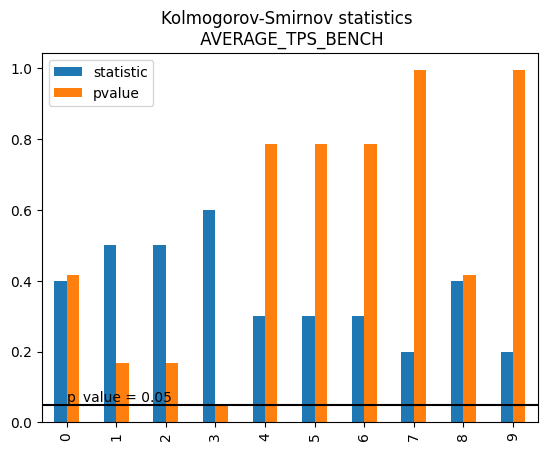

In [8]:
df_k2 = pd.DataFrame(ks_2samp_list)
df_epps = pd.DataFrame(epps_2samp_list)


df_k2.plot(kind = "bar",title = "Kolmogorov-Smirnov statistics \n AVERAGE_TPS_BENCH")
plt.hlines(0.05, xmin = -1, xmax = 10, color = 'black')
plt.text(0, 0.06, "p_value = 0.05")

In [9]:
df_epps.pvalue

0    0.506910
1    0.490531
2    0.229756
3    0.018513
4    0.475910
5    0.568743
6    0.473532
7    0.490944
8    0.480866
9    0.839403
Name: pvalue, dtype: float64

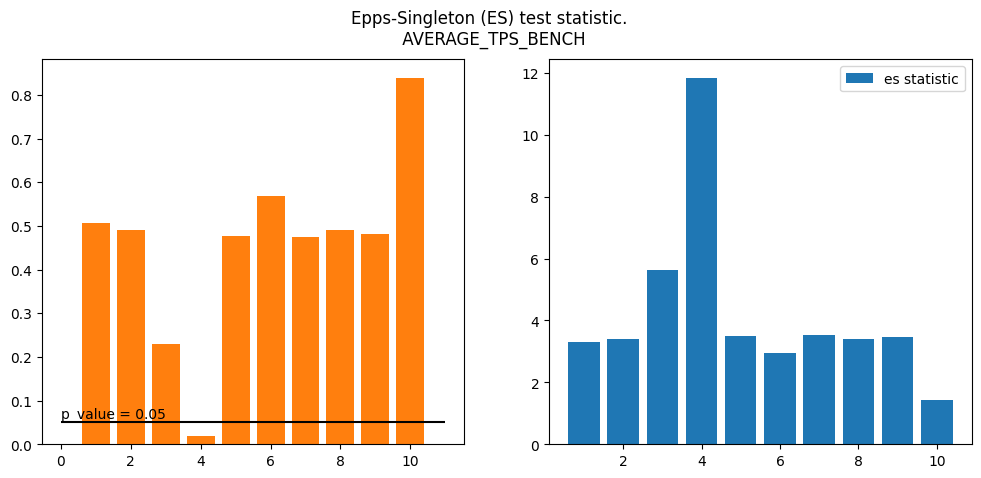

In [10]:
fig, axx = plt.subplots(1,2, figsize = (12,5))

plt.suptitle("Epps-Singleton (ES) test statistic. \n AVERAGE_TPS_BENCH")
axx[0].bar(range(1,11), df_epps.pvalue, label = "pvalue", color = "#ff7f0e")
axx[0].hlines(0.05, xmin = 0, xmax = 11, color = 'black')
axx[0].text(0, 0.06, "p_value = 0.05")
axx[1].bar(range(1,11), df_epps.statistic, label = "es statistic")
plt.legend()

# SLHC desigh 4 variance

In [11]:
fpath1 = "data/out_slhc_design_for_variance.csv"
df1 = pd.read_csv(fpath1)
df1

,ITER,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,0,3.0,60.0,950.0,1017.0,1900000.0,168.0,27.528220,0.0,59638,448,626
1,1,3.0,60.0,950.0,1017.0,1900000.0,168.0,30.847692,0.0,59108,477,631
2,2,3.0,60.0,950.0,1017.0,1900000.0,168.0,29.576094,0.0,59507,416,679
3,3,3.0,60.0,950.0,1017.0,1900000.0,168.0,25.955353,0.0,59806,428,635
4,4,3.0,60.0,950.0,1017.0,1900000.0,168.0,33.158000,0.0,58316,425,588
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,5.0,66.0,1050.0,983.0,2100000.0,152.0,26.684143,0.0,60038,437,629
96,6,5.0,66.0,1050.0,983.0,2100000.0,152.0,27.615225,0.0,59935,422,665
97,7,5.0,66.0,1050.0,983.0,2100000.0,152.0,27.173769,0.0,60156,437,614
98,8,5.0,66.0,1050.0,983.0,2100000.0,152.0,26.823427,0.0,60644,465,654


In [12]:
av_tps_bench1_list = []

for i in range(10):
    df1_exp = df1[i*10:(i+1)*10]
    av_tps_bench1_list.append(df1_exp["AVERAGE_TPS_BENCH1"].values)

In [13]:
import numpy as np

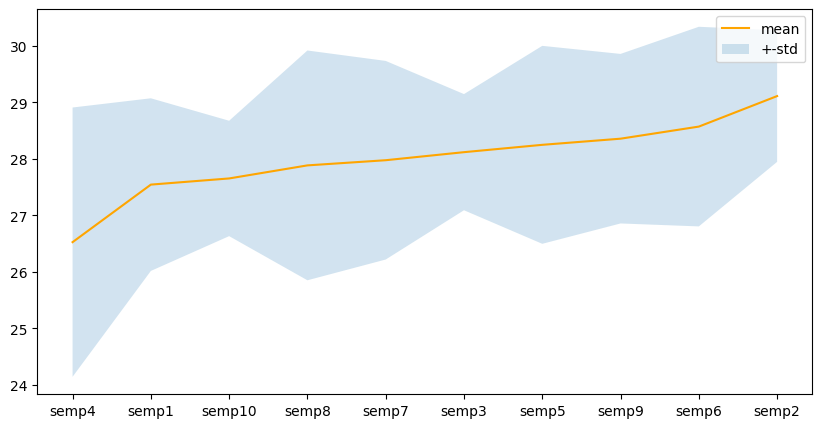

In [14]:
atb1_df  = pd.DataFrame(av_tps_bench1_list, columns = ["semp{}".format(i+1) for i in range(10)])

atb1_stat_df = pd.DataFrame({"mean":atb1_df.mean(), "std":atb1_df.std()}).sort_values(by="mean")


plt.figure(figsize = (10,5))
plt.plot(atb1_stat_df["mean"], label = "mean", color = "orange")
plt.fill_between(atb1_stat_df.index, 
                 y1 =atb1_stat_df["mean"] + atb1_stat_df["std"],
                y2 = atb1_stat_df["mean"] - atb1_stat_df["std"],
                alpha = 0.2, label = "+-std")
plt.legend()

In [15]:
am_av = atb1_stat_df["mean"].values
amn_av = am_av.mean()
VAR_EXP = ((am_av - amn_av)**2).mean()
EXP_VAR = ((atb1_df - am_av)**2).mean(0).mean()
SNR = VAR_EXP/EXP_VAR
SNR

0.13077208534498672

# Baseline: GB, GP, SVR

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    import optuna
except ModuleNotFoundError:
    !pip install optuna -q
    import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
def load_data():

    feature_cols = ['NUM_THREADS', 'TICKS_PER_SLOT', 'RECV_BATCH_MAX_CPU',
        'ITER_BATCH_SIZE', 'HASHES_PER_SECOND', 'TICKS_PER_SECOND']
    target_col = ["AVERAGE_TPS_BENCH1"]

    df50_train = pd.read_csv("data/out_slhc_design_train_50.csv")
    df100_train = pd.read_csv("data/out_slhc_design_train_100.csv")
    df200_train = pd.read_csv("data/out_slhc_design_train_200.csv")
    df100_test = pd.read_csv("data/out_slhc_design_test_100.csv")
    print(df50_train.shape, df100_train.shape, df200_train.shape)

    display(df50_train.head(3))
    display(df100_test.head(3))
    display(df200_train.head(3))

    X_tr50 = df50_train[feature_cols]
    y_tr50 = df50_train[target_col].values
    X_tr100 = df100_train[feature_cols]
    y_tr100 = df100_train[target_col].values
    X_tr200 = df200_train[feature_cols]
    y_tr200 = df200_train[target_col].values
    X_tt100 = df100_test[feature_cols]
    y_tt100 = df100_test[target_col].values

    data50 = dict(train = {"X":X_tr50,"y":y_tr50}, test = {"X":X_tt100,"y":y_tt100})
    data100 = dict(train = {"X":X_tr100,"y":y_tr100}, test = {"X":X_tt100,"y":y_tt100})
    data200 = dict(train = {"X":X_tr200,"y":y_tr200}, test = {"X":X_tt100,"y":y_tt100})
    return data50, data100, data200
data50, data100, data200 = load_data()

(50, 12) (100, 11) (200, 12)


,ITER,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,0,3.0,58.0,1009.0,862.0,1797959.0,150.0,28.031420,0.0,76798,606,1043
1,0,3.0,54.0,1095.0,911.0,2042857.0,160.0,25.790245,0.0,76976,539,837
2,0,3.0,65.0,942.0,991.0,1846939.0,144.0,30.544668,0.0,120178,419,897


,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,3.0,65.0,974.0,1123.0,2033333.0,146.0,27.570316,0.0,59834,418,672
1,3.0,59.0,911.0,935.0,1930303.0,142.0,27.335081,0.0,61926,506,659
2,3.0,71.0,892.0,1114.0,1706061.0,165.0,27.530470,0.0,59923,529,664


,ITER,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,0,3.0,60.0,946.0,953.0,1932161.0,140.0,27.671816,0.0,74974,599,1078
1,0,3.0,53.0,895.0,916.0,1724121.0,168.0,30.184893,0.0,74131,579,997
2,0,3.0,63.0,1090.0,862.0,1832663.0,155.0,30.506160,0.0,74487,436,699


In [18]:
data50["train"]["X"].columns, data100["train"]["X"].columns,
display(data100["train"]["X"])
display(data100["test"]["X"])

,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND
0,3.0,70.0,1056.0,1120.0,1996970.0,152.0
1,3.0,65.0,871.0,989.0,2190909.0,138.0
2,3.0,67.0,929.0,856.0,2227273.0,163.0
3,3.0,67.0,947.0,1105.0,2239394.0,142.0
4,3.0,63.0,1011.0,1071.0,1948485.0,173.0
...,...,...,...,...,...,...
95,5.0,63.0,989.0,929.0,2051515.0,147.0
96,5.0,59.0,1053.0,895.0,1760606.0,178.0
97,5.0,59.0,1071.0,1144.0,1772727.0,157.0
98,5.0,61.0,1129.0,1011.0,1809091.0,182.0


,NUM_THREADS,TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,HASHES_PER_SECOND,TICKS_PER_SECOND
0,3.0,65.0,974.0,1123.0,2033333.0,146.0
1,3.0,59.0,911.0,935.0,1930303.0,142.0
2,3.0,71.0,892.0,1114.0,1706061.0,165.0
3,3.0,60.0,944.0,971.0,1954545.0,171.0
4,3.0,57.0,983.0,1038.0,2160606.0,180.0
...,...,...,...,...,...,...
95,5.0,69.0,1017.0,962.0,1839394.0,140.0
96,5.0,66.0,1056.0,1029.0,2045455.0,149.0
97,5.0,55.0,1108.0,886.0,2293939.0,155.0
98,5.0,67.0,1089.0,1065.0,2069697.0,178.0


In [19]:
model = SVR()
X = data50["train"]["X"]
y =  data50["train"]["y"]
model.fit(X,y)
def _rrmse(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2)/np.mean((y_pred) ** 2))
_rrmse(model, X,y)

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.10534142602800664

In [20]:
gbr = GradientBoostingRegressor()     
     
def calc_crossval_scores(model, X, y):
    def _rrmse(estimator, X, y):
     y_pred = estimator.predict(X)
     return np.sqrt(np.mean((y - y_pred) ** 2)/np.mean((y_pred) ** 2))
                                                                       
    mse_cv = -cross_val_score(estimator=model,X=X,y=y,cv=5,scoring="neg_mean_squared_error" ).mean()
    rmse_cv = -cross_val_score(estimator=model,X=X,y=y,cv=5,scoring="neg_root_mean_squared_error" ).mean()
    rrmse_cv = cross_val_score(estimator=model,X=X,y=y,cv=5,scoring=_rrmse).mean()
    return mse_cv, rmse_cv, rrmse_cv

def create_gbr(trial):

    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    lr = trial.suggest_float('learning_rate', 0.01, 0.9) 
    loss = trial.suggest_categorical('loss', ['squared_error', 'absolute_error'])
    model = GradientBoostingRegressor(n_estimators = n_estimators, max_depth=max_depth, learning_rate = lr, loss=loss)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def create_svr(trial):

    C= trial.suggest_float('C', 0.1, 1.0)
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"]) 
    kernel = trial.suggest_categorical('kernel', ["rbf","sigmoid"])
    model = SVR(kernel=kernel, gamma=gamma, C=C)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model

def create_gpr(trial):
    
    constant_value = trial.suggest_float("constant_value", 0 , 10)
    length_scale = trial.suggest_float("length_scale", 0 , 20)
    noise_level = trial.suggest_float("noise_level", 0, 10)
    
    kernel = (ConstantKernel(constant_value=constant_value) +
    ConstantKernel(constant_value=constant_value) * RBF(length_scale=length_scale, length_scale_bounds=(1e-010, 100000.0)) + 
    WhiteKernel(noise_level=noise_level)
             )

    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def objective(trial, model_type: str, data):
    if model_type == "gbr":
        model = create_gbr(trial)
    elif model_type == "svr":
        model = create_svr(trial)
    elif model_type=="gpr":
        model = create_gpr(trial)
    X = data["train"]["X"]

    neg_rmse_gbr_cv = cross_val_score(estimator=model,X=X,y=data["train"]["y"],
                                      cv=5,scoring="neg_root_mean_squared_error").mean()
    return neg_rmse_gbr_cv

def optimize(model_type, data, n_trials=2):
    study = optuna.create_study(direction='maximize', study_name=f"{model_type}_opt")
    study.optimize(lambda trial: objective(trial,model_type, data), n_trials=n_trials)
    return study.best_params
    
    
def best_fit(model_type, data, best_params):
    if model_type == "gbr":
        best_model = GradientBoostingRegressor(**best_params)
    elif model_type=="svr":
        best_model = SVR(**best_params)
    elif model_type=="gpr":
        kernel = (ConstantKernel(constant_value=best_params["constant_value"]) +
        ConstantKernel(constant_value=best_params["constant_value"])*
        RBF(length_scale=best_params["length_scale"],  length_scale_bounds=(1e-010, 100000.0)) + WhiteKernel(noise_level=best_params["noise_level"])
                 )
        best_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
        
    mse_train_best , rmse_train_best, rrmse_train_best = calc_crossval_scores(best_model, data['train']["X"],data['train']["y"])
    print(f"Best {model_type} MSE (train): {mse_train_best}, RMSE: {rmse_train_best}, RRMSE: {rrmse_train_best}")

    mse_test_best , rmse_test_best,rrmse_test_best = calc_crossval_scores(best_model, data['test']["X"],data['test']["y"])
    print(f"Best {model_type} MSE (test): {mse_test_best}, RMSE: {rmse_test_best}, RRMSE: {rrmse_test_best} \n")
    results  = dict(
         train_scores = dict (
              MSE = mse_train_best,
              RMSE= rmse_train_best,
              RRMSE= rrmse_train_best,
         ),
         test_scores = dict (
              MSE = mse_test_best,
              RMSE= rmse_test_best,
              RRMSE= rrmse_test_best,              
         )
    )
    return results

def plot_barhcarts(scores_df, title =""):
    fig, axx = plt.subplots(1,3, figsize=(20,5))
    # Bar width
    barWidth = 0.2
    # Set position of bar on X axis
    r1 = range(len(scores_df))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    # Create bars
    plt.suptitle(title)
    axx[0].bar(r1, scores_df['MSE'], color='r', width=barWidth, edgecolor='grey', label='MSE')
    axx[1].bar(r2, scores_df['RMSE'], color='g', width=barWidth, edgecolor='grey', label='RMSE')
    axx[2].bar(r3, scores_df['RRMSE'], color='b', width=barWidth, edgecolor='grey', label='RRMSE')

    # Add xticks on the middle of the group bars
    for i in range(3):
        axx[i].set_xlabel('Data', fontweight='bold')
        axx[i].set_xticks([r + barWidth for r in range(len(scores_df))], scores_df['name'])
        # Create legend & Show graphic
        axx[i].legend()
        fig.show()
        os.makedirs("data/scores", exist_ok=True)
        plt.savefig(f"data/scores/{title}.png")

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/

Best svr MSE (train): 8.508674101393112, RMSE: 2.674400046933142, RRMSE: 0.09654694796783589
Best svr MSE (test): 3.0916477148397767, RMSE: 1.6998305651008185, RRMSE: 0.06101668769730142 

Best svr MSE (train): 4.109193542085891, RMSE: 1.9441021877632807, RRMSE: 0.07079719311328611


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/

Best svr MSE (test): 3.1003432362730106, RMSE: 1.7121960393670164, RRMSE: 0.061986941876321436 



/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/

Best svr MSE (train): 20.072773919926384, RMSE: 4.41818903231233, RRMSE: 0.1730823513510911
Best svr MSE (test): 3.120071075275762, RMSE: 1.7176882383786378, RRMSE: 0.06207357577346637 



/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


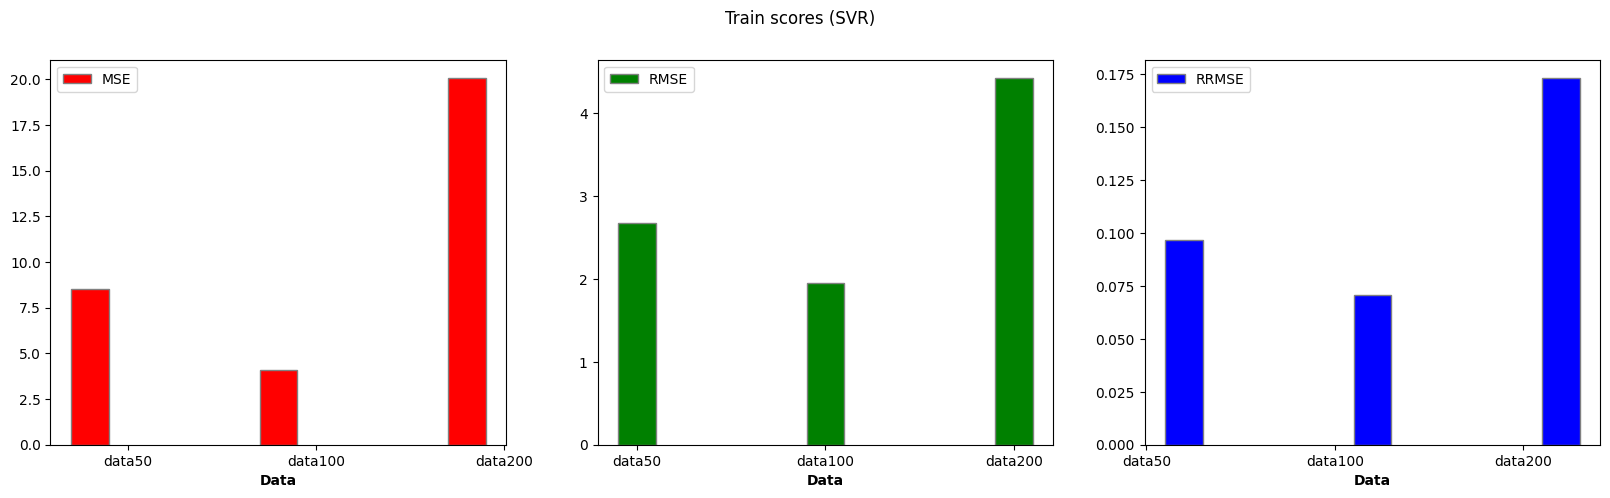

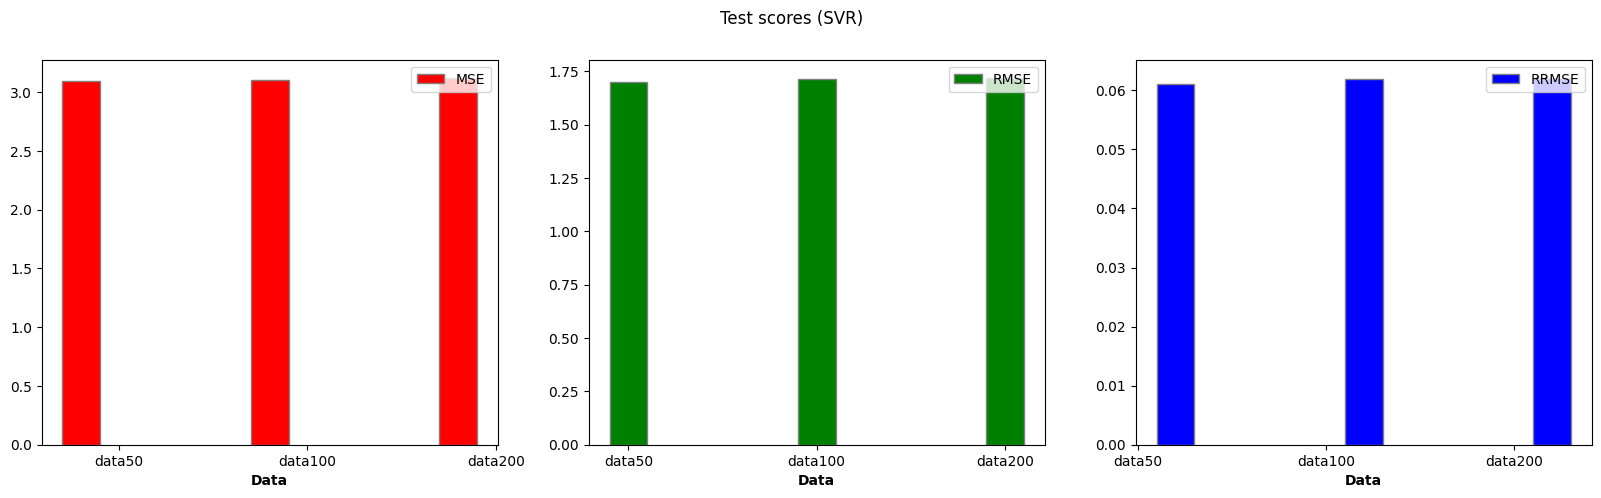

In [21]:
model_type="svr"
n_trials=20
train_scores_list = []
test_scores_list = []
for dname, data in zip(["data50", "data100", "data200"],[data50, data100, data200]):
    scores_dict = best_fit(model_type, data,  best_params= optimize(model_type, data, n_trials=n_trials))
    scores_dict["train_scores"]["name"],scores_dict["test_scores"]["name"] =  dname, dname
    train_scores_list.append(scores_dict["train_scores"])
    test_scores_list.append(scores_dict["test_scores"])
train_scores_df  = pd.DataFrame(train_scores_list)
test_scores_df = pd.DataFrame(test_scores_list)

plot_barhcarts(train_scores_df, title="Train scores (SVR)")
plot_barhcarts(test_scores_df, title="Test scores (SVR)")

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is t

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is t

Best gbr MSE (train): 11.576667585804683, RMSE: 3.200392695573356, RRMSE: 0.12275862488099884


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is t

Best gbr MSE (test): 3.73043483920123, RMSE: 1.8730590411588934, RRMSE: 0.06755171079365979 



/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is t

Best gbr MSE (train): 6.82021605996633, RMSE: 2.4527595373352904, RRMSE: 0.09033417237696917


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is t

Best gbr MSE (test): 5.6436877907900165, RMSE: 2.274625754857901, RRMSE: 0.07947982343445617 



/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is t

Best gbr MSE (train): 14.968767265077679, RMSE: 3.885761368342017, RRMSE: 0.145371937559281


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is t

Best gbr MSE (test): 4.382559215344324, RMSE: 2.0601665821771324, RRMSE: 0.07166535905376263 



/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus can

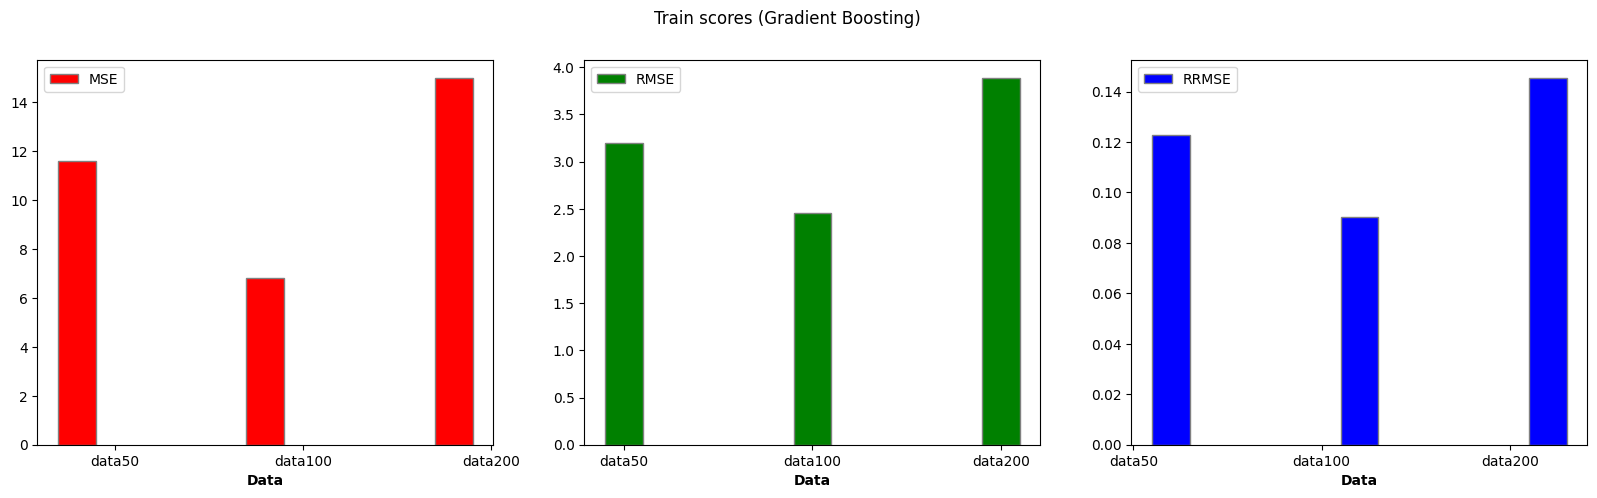

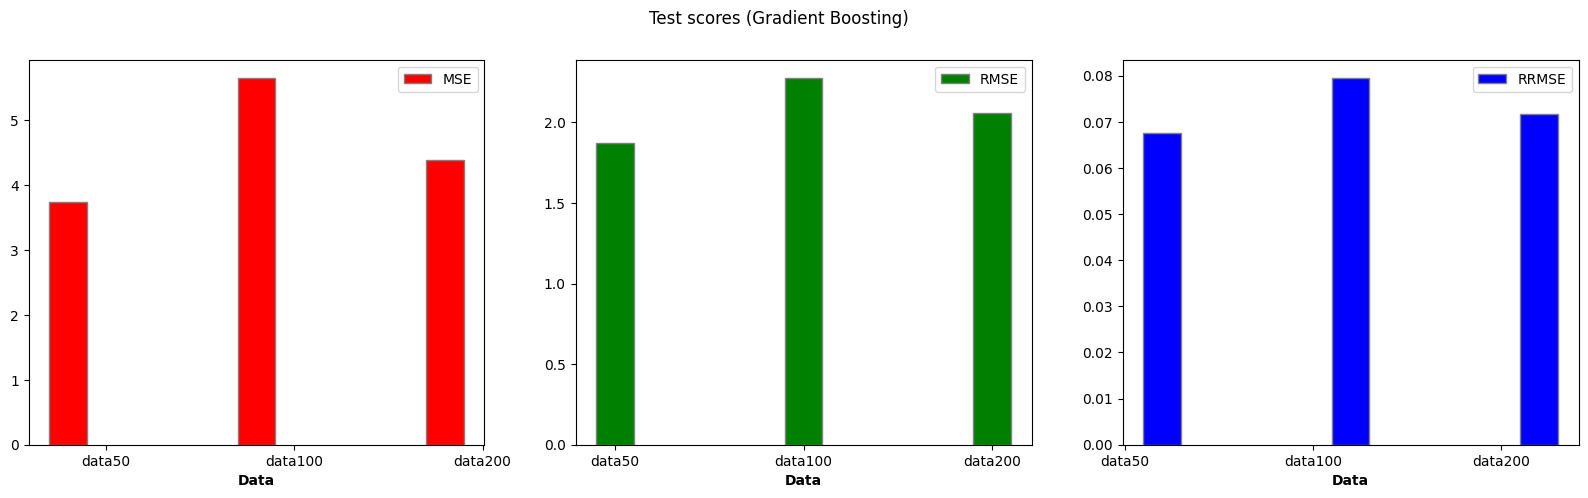

In [22]:
model_type="gbr"
n_trials=2
train_scores_list = []
test_scores_list = []
for dname, data in zip(["data50", "data100", "data200"],[data50, data100, data200]):
    scores_dict = best_fit(model_type, data,  best_params= optimize(model_type, data, n_trials=n_trials))
    scores_dict["train_scores"]["name"],scores_dict["test_scores"]["name"] =  dname, dname
    train_scores_list.append(scores_dict["train_scores"])
    test_scores_list.append(scores_dict["test_scores"])
train_scores_df  = pd.DataFrame(train_scores_list)
test_scores_df = pd.DataFrame(test_scores_list)

plot_barhcarts(train_scores_df, title="Train scores (Gradient Boosting)")
plot_barhcarts(test_scores_df, title="Test scores (Gradient Boosting)")

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best gpr MSE (train): 8.401154929657476, RMSE: 2.693293708792136, RRMSE: 0.09930831473481362


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Best gpr MSE (test): 3.2210323126660088, RMSE: 1.7335709170968236, RRMSE: 0.06189326124861788 

Best gpr MSE (train): 4.233765167580539, RMSE: 1.9789842718955892, RRMSE: 0.07254471508770834


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 1e-10. Decreasing the bou

Best gpr MSE (test): 3.221032308698814, RMSE: 1.7279976725519788, RRMSE: 0.061893261193536706 



/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Best gpr MSE (train): 15.780207521784027, RMSE: 3.96588907251149, RRMSE: 0.1592709476225734
Best gpr MSE (test): 3.2210323255175646, RMSE: 1.7279976717666319, RRMSE: 0.06189326129397897 



/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/2659736058.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus can

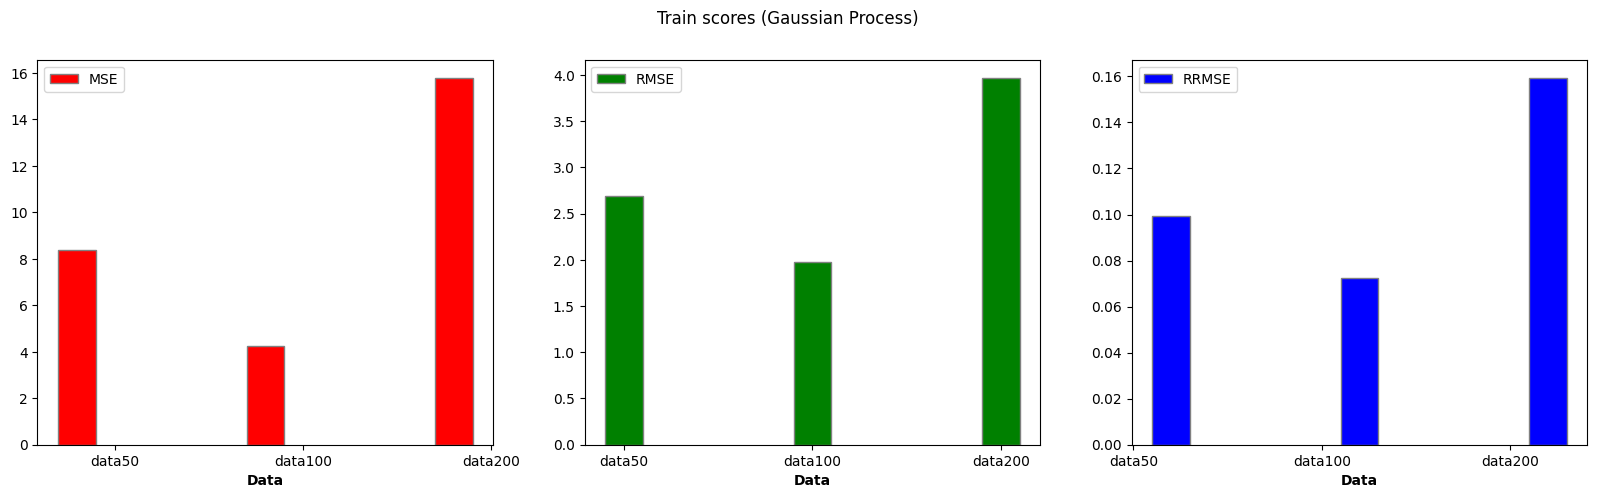

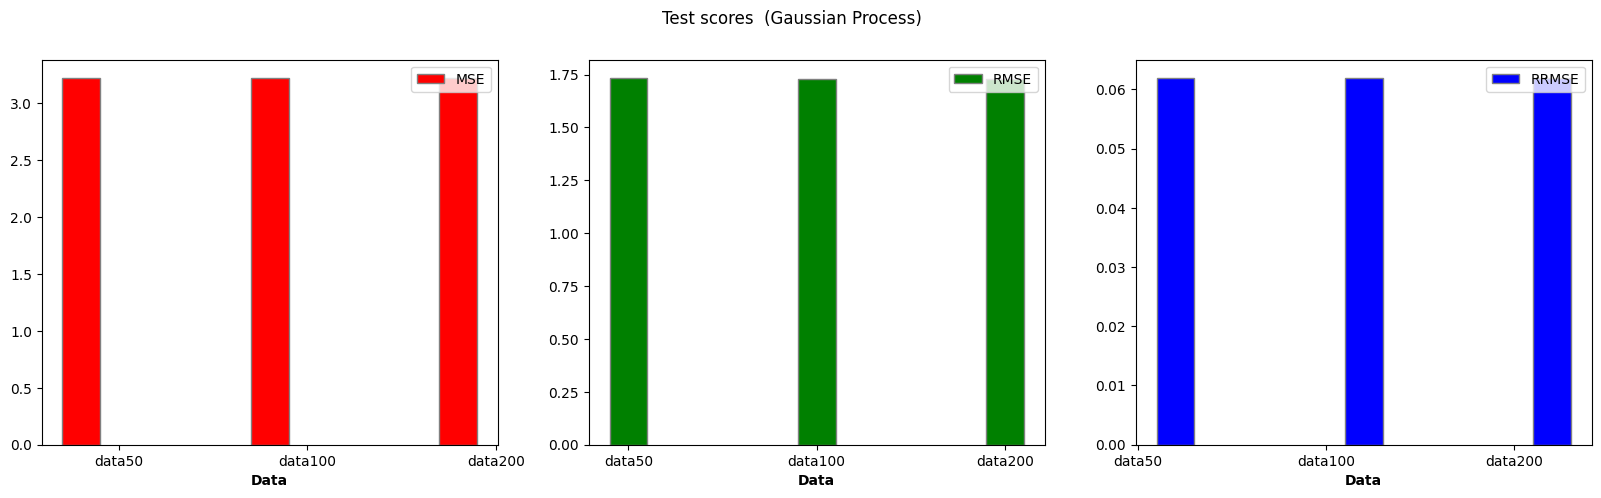

In [23]:
model_type="gpr"
n_trials=2
train_scores_list = []
test_scores_list = []
for dname, data in zip(["data50", "data100", "data200"],[data50, data100, data200]):
    scores_dict = best_fit(model_type, data,  best_params= optimize(model_type, data, n_trials=n_trials))
    scores_dict["train_scores"]["name"],scores_dict["test_scores"]["name"] =  dname, dname
    train_scores_list.append(scores_dict["train_scores"])
    test_scores_list.append(scores_dict["test_scores"])
train_scores_df  = pd.DataFrame(train_scores_list)
test_scores_df = pd.DataFrame(test_scores_list)

plot_barhcarts(train_scores_df, title="Train scores (Gaussian Process)")
plot_barhcarts(test_scores_df, title="Test scores  (Gaussian Process)")

In [24]:
# import torch
# import gpytorch
# from gpytorch.means import ConstantMean
# from gpytorch.kernels import RBFKernel
# from gpytorch.likelihoods import GaussianLikelihood

# # Initialize GP model and likelihood
# class ExactGPModel(gpytorch.models.ExactGP):
#     def __init__(self, train_x, train_y, likelihood):
#         super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
#         self.mean_module = ConstantMean()
#         self.covar_module = RBFKernel()

#     def forward(self, x):
#         mean_x = self.mean_module(x)
#         covar_x = self.covar_module(x)
#         return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
# # Generate synthetic data
# train_X = torch.linspace(0, 1, 10).unsqueeze(-1)
# train_Y = torch.sin(train_X * (2 * 3.1416)) + 0.1 * torch.randn_like(train_X)
# likelihood = GaussianLikelihood()
# model = ExactGPModel(train_X, train_Y, likelihood)
# mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# # Set up optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# for i in range(50):
#     optimizer.zero_grad()
#     output = model(train_X)
#     loss = -mll(output, train_Y).mean() 
#     loss.backward()
#     optimizer.step()
#     output_mean = output.mean
#     output_variance = output.variance
    
#     print("Iteration {}: Mean={}, Variance={}".format(i+1, output_mean, output_variance))

# # After optimization, get optimized parameters
# print("Optimized Likelihood Noise Level:", likelihood.noise.item())

In [25]:
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     test_X = train_X
#     print(test_X.shape)
#     observed_pred = likelihood(model(test_X))
#     lower, upper = observed_pred.confidence_region()

In [26]:
# observed_pred.mean

In [27]:
# import torch
# import gpytorch
# import matplotlib.pyplot as plt

# # Define your training data (train_X, train_Y) and initialize your GP model and likelihood
# # Plot initial model fit
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     test_X = torch.linspace(0, 1, 10).unsqueeze(-1)
#     print(test_X.shape)
#     observed_pred = model(test_X)
#     lower, upper = observed_pred.confidence_region()
    
#     plt.figure(figsize=(12, 6))
#     plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#     plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label='Initial Model Fit')
# #     plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#     plt.legend()
#     plt.title('Initial Model Fit')
#     plt.show()

# # Optimization loop
# for i in range(10):
#     optimizer.zero_grad()
#     output = model(train_X)
#     loss = -mll(output, train_Y).mean()  # Calculate mean of the loss tensor
#     loss.backward()
#     optimizer.step()

#     # Plot updated model fit after each iteration
#     with torch.no_grad():
# #         model.eval()
# #         likelihood.eval()
#         observed_pred = likelihood(model(test_X))
#         lower, upper = observed_pred.confidence_region()

#         plt.figure(figsize=(12, 6))
#         plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#         plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label=f'Iteration {i+1}')
# #         plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#         plt.legend()
#         plt.title(f'Iteration {i+1}')
#         plt.show()

# # Plot final model fit
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     observed_pred = likelihood(model(test_X))
#     lower, upper = observed_pred.confidence_region()

#     plt.figure(figsize=(12, 6))
#     plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#     plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label='Final Model Fit')
# #     plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#     plt.legend()
#     plt.title('Final Model Fit')
#     plt.show()

# Baesian optimization

In [28]:
try: 
    import gpytorch
except:
    %pip install gpytorch botorch -q
import random
import gpytorch
import botorch
import torch
import os
import time
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.constraints import Interval
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound, ExpectedImprovement
from botorch.optim import optimize_acqf
from sklearn.preprocessing import MinMaxScaler
import gpytorch.settings as gpts
from gpytorch.constraints import Interval
from gpytorch.distributions import MultivariateNormal
from gpytorch.kernels import MaternKernel, RFFKernel, ScaleKernel, MaternKernel
from torch.quasirandom import SobolEngine
from contextlib import ExitStack


from botorch.generation import MaxPosteriorSampling
from botorch.utils.transforms import unnormalize

dtype = torch.double
SMOKE_TEST = os.environ.get("SMOKE_TEST")

USE_KEOPS = True if not SMOKE_TEST else False
N_CAND = 50 if not SMOKE_TEST else 10
N_CAND_CHOL = 50 if not SMOKE_TEST else 10

In [29]:
X.shape

(50, 6)

In [30]:
scaler = MinMaxScaler()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.double

X = torch.tensor(scaler.fit_transform(data50["train"]["X"].values))
y = torch.tensor(data50["train"]["y"])

model_local = SingleTaskGP(X, y)
mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local)
fit_gpytorch_mll(mll)

model_fix = SVR(**optimize("svr", data50, n_trials=20))
model_fix.fit(data50["train"]["X"], data50["train"]["y"])

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([27.0541], dtype=torch.float64), std = tensor([2.8561], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/

SVR(C=0.9970366209827461, gamma='auto')

## UCB AF

In [31]:
UCB = UpperConfidenceBound(model_local, beta=0.1)
#Optimizing acquisiton function
lb = torch.Tensor([3, 850, 850, 53, 1700000, 136])
rb = torch.Tensor([5, 1150, 1150, 73, 2300000, 184])

bounds = torch.stack([lb, rb])
candidate, acq_value = optimize_acqf(
        UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=100,
    )

X_opt_ucb = scaler.inverse_transform(candidate)
Y_opt_ucb = acq_value
Y_bb_ucb = model_fix.predict(X_opt_ucb)
print(X_opt_ucb)
print(f"Our optimisation result {Y_opt_ucb}")
print(f"Our blackbox result {Y_bb_ucb}") #our blackbox
print(f"Initial max result {y.max()}")

[[1.15778084e+01 1.85719087e+04 3.25613367e+05 1.69650734e+04
  1.15872132e+12 8.45250537e+03]]
Our optimisation result 27.637384560496972
Our blackbox result [27.68083866]
Initial max result 31.261854


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


## Expected Improvement AF

In [32]:
EI = ExpectedImprovement(model_local, best_f=0.5, maximize = True)

candidate, acq_value = optimize_acqf(
        EI, bounds=bounds, q=1, num_restarts=5, raw_samples=100,
    )

X_opt_ei = scaler.inverse_transform(candidate)
Y_opt_ei = acq_value
Y_bb_ei = model_fix.predict(X_opt_ei)
print(X_opt_ei)
print(f"Our optimisation result {Y_opt_ei}")
print(f"Our blackbox result {Y_bb_ei}") #our blackbox
print(f"Initial max result {y.max()}")

[[1.24937744e+01 1.77816682e+04 3.05933978e+05 1.90419518e+04
  1.09852175e+12 6.82657422e+03]]
Our optimisation result 26.52014429333372
Our blackbox result [27.68083866]
Initial max result 31.261854


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


# Thompson sampling

In [33]:
## Tompson Sampling
def generate_batch(
    X,
    Y,
    batch_size,
    n_candidates,
    sampler="cholesky",  # "cholesky", "ciq", "rff"
    use_keops=False,
):
    assert sampler in ("cholesky", "ciq", "rff", "lanczos")
    #assert X.min() >= 0.0 and X.max() <= 1.0 and torch.all(torch.isfinite(Y))

    # NOTE: We probably want to pass in the default priors in SingleTaskGP here later
    kernel_kwargs = {"nu": 2.5, "ard_num_dims": X.shape[-1]}
    if sampler == "rff":
        base_kernel = RFFKernel(**kernel_kwargs, num_samples=1024)
    else:
        base_kernel = (
            KMaternKernel(**kernel_kwargs)
            if use_keops
            else MaternKernel(**kernel_kwargs)
        )
    covar_module = ScaleKernel(base_kernel)

    # Fit a GP model
    train_X = torch.from_numpy(scaler.fit_transform(X))
    train_Y = (Y - Y.mean()) / Y.std()
    model_local = SingleTaskGP(train_X, train_Y,covar_module=covar_module)
    mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local)
    fit_gpytorch_mll(mll)

    # Draw samples on a Sobol sequence
    sobol = SobolEngine(X.shape[-1], scramble=True)
    X_cand = sobol.draw(n_candidates).to(dtype=dtype, device=device)

    # Thompson sample
    with ExitStack() as es:
        if sampler == "cholesky":
            es.enter_context(gpts.max_cholesky_size(float("inf")))
        elif sampler == "ciq":
            es.enter_context(gpts.fast_computations(covar_root_decomposition=True))
            es.enter_context(gpts.max_cholesky_size(0))
            es.enter_context(gpts.ciq_samples(True))
            es.enter_context(
                gpts.minres_tolerance(2e-3)
            )  # Controls accuracy and runtime
            es.enter_context(gpts.num_contour_quadrature(15))
        elif sampler == "lanczos":
            es.enter_context(gpts.fast_computations(covar_root_decomposition=True))
            es.enter_context(gpts.max_cholesky_size(0))
            es.enter_context(gpts.ciq_samples(False))
        elif sampler == "rff":
            es.enter_context(gpts.fast_computations(covar_root_decomposition=True))

        thompson_sampling = MaxPosteriorSampling(model=model_local, replacement=True)
        X_next = thompson_sampling(X_cand, num_samples=batch_size)
        
    X_ans_next = torch.from_numpy(scaler.inverse_transform(X_next))
    
    return X_ans_next

def thompson_optimization(data,
    sampler, n_candidates, max_evals, batch_size, use_keops=False
):
    X = torch.from_numpy(data["train"]["X"].values)
    Y = torch.from_numpy(data["train"]["y"])
    
    print(f"len {len(Y)}, shape {Y.dim()} Best value: {Y.max().item():.2e}")

    while len(X) < max_evals:
        # Create a batch
        start = time.monotonic()
        X_next = generate_batch(
            X=X,
            Y=Y,
            batch_size=min(batch_size, max_evals - len(X)),
            n_candidates=n_candidates,
            sampler=sampler,
            use_keops=use_keops,
        )
        
        end = time.monotonic()
        #print(f"Generated batch in {end - start:.1f} seconds")
        
        #here we are using blackbox
        Y_next = torch.tensor(
            [model_local.posterior(x.reshape(1, -1)).mean for x in X_next], dtype=dtype, device=device
        ).reshape(-1,1)
#         Y_next = torch.tensor(
#             [model_fix.predict(x.reshape(1, -1)) for x in X_next], dtype=dtype, device=device
#         )
        # Append data
        X = torch.cat((X, X_next), dim=0)
        Y = torch.cat((Y, Y_next), dim=0)

        #print(f"{len(X)}) Best value: {Y.max().item():.2e}")
    return X, Y

batch_size = 2
max_evals = 100+30

shared_args = {
    "max_evals": max_evals,
    "batch_size": batch_size,
}
X_th, Y_th = thompson_optimization(data50,"cholesky", N_CAND, **shared_args)

len 50, shape 2 Best value: 3.13e+01


In [34]:
Y_opt_th = Y_th[len(data50["train"]['y']):].max().item()
Y_opt_th_ind = Y_th[len(data50["train"]['y']):].argmax()
X_opt_th = scaler.inverse_transform(X_th[100:][Y_opt_th_ind].reshape(1,-1))
Y_bb_th = model_fix.predict(X_opt_th)
y = torch.from_numpy(data50["train"]["y"])

print(X_opt_th)
print(f"Our optimisation result {Y_opt_th}")
print(f"Our blackbox result {Y_bb_th}") #our blackbox
print(f"Initial max result {y.max()}")

[[9.36221075e+00 1.13379641e+03 3.25637560e+05 3.42092595e+05
  1.16061737e+12 7.69815337e+03]]
Our optimisation result 27.02014429333372
Our blackbox result [27.68083866]
Initial max result 31.261854


/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [35]:
import numpy as np
try:
    import pySOT
except:
    !pip install pySOT -q
import numpy as np
from pySOT.strategy import DYCORSStrategy
from pySOT.auxiliary_problems import candidate_dycors
from pySOT.surrogate import gp
from pySOT.optimization_problems import OptimizationProblem, Hartmann3
from pySOT.experimental_design import SymmetricLatinHypercube
from poap.controller import ThreadController, SerialController

In [36]:
# Define the search space
lower_bounds = np.zeros(3)
upper_bounds = np.ones(3)


# Create an instance of the Optim class
optim = Hartmann3()#Optim(2, lower_bounds, upper_bounds)

# Create the GP surrogate model
surrogate = gp.GPRegressor(3, lower_bounds, upper_bounds)

# Create the experimental design
max_evals = 100
input_dimensionality=3
slhd = SymmetricLatinHypercube(dim=input_dimensionality,num_pts=2*input_dimensionality+1)

# Create the DYCORSStrategy optimizer
strategy = DYCORSStrategy(max_evals=max_evals, opt_prob=optim, exp_design=slhd, 
                          surrogate=surrogate,
                         batch_size=1)
# optimizer.generate_evals(num_pts=10)

controller = SerialController(objective=optim.eval)
controller.strategy = strategy
controller.run()
results_serial = np.array([o.value for o in controller.fevals if o.value is not None])
results_serial.min()

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified upper bound 2.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fi

/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 2.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fi

-3.862534602650675

In [37]:
lb = np.array([3, 850, 850, 53, 1700000, 136])
rb = np.array([5, 1150, 1150, 73, 2300000, 184])
reg = gp.GPRegressor(6, lb, rb)
reg._X = data50["train"]["X"].values
reg.fX =  data50["train"]["y"]
x = torch.tensor([4.000000e+00, 8.830000e+02, 8.500000e+02, 6.000000e+01, 2.233333e+06,
 1.790000e+02])
reg.predict(x)

array([27.05411316])

In [38]:
best_params = optimize("gpr", data100, n_trials=2)
kernel = (ConstantKernel(constant_value=best_params["constant_value"]) +
    ConstantKernel(constant_value=best_params["constant_value"])*
    RBF(length_scale=best_params["length_scale"],  length_scale_bounds=(1e-010, 100000.0)) + WhiteKernel(noise_level=best_params["noise_level"])
            )
model_fix = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
model_fix.fit(X,y)


GaussianProcessRegressor(kernel=2.3**2 + 2.3**2 * RBF(length_scale=11.2) + WhiteKernel(noise_level=9.05),
                         n_restarts_optimizer=2)

In [39]:
x = torch.tensor([4.000000e+00, 8.830000e+02, 8.500000e+02, 6.000000e+01, 2.233333e+06,
 1.790000e+02])

In [40]:
model_local.posterior(x.reshape(1,-1)).mean.item()

27.02014429333372

In [42]:
import warnings 
import torch
warnings.simplefilter('ignore')
from pySOT.surrogate import RBFInterpolant, CubicKernel, LinearTail
# Define the objective function
max_evals = 1
input_dimensionality=6


class Optim(OptimizationProblem):

    def __init__(self, dim=6, lower_bounds=None, upper_bounds=None):
        self.best_x = []
        self.dim = dim
        self.lb = lower_bounds
        self.ub = upper_bounds
        self.int_var = np.arange(0, dim) 
        self.cont_var = np.array([])
        self.info = str(dim) + "-dimensional black box"

    def eval(self, x):
        # print(x)
        self.best_x.append(x)
        surrogate._X = X
        surrogate.fX =  y
        return surrogate.predict(x)[0]

# Define the search space
lower_bounds = np.array([3, 850, 850, 53, 1700000, 136])
upper_bounds = np.array([5, 1150, 1150, 73, 2300000, 184])


# Create an instance of the Optim class
optim = Optim(6, lower_bounds, upper_bounds)
surrogate = gp.GPRegressor(6, lower_bounds, upper_bounds)
# Create the GP surrogate model
# surrogate = RBFInterpolant(
#     dim=input_dimensionality, lb=lower_bounds, ub=upper_bounds, kernel=CubicKernel(), tail=LinearTail(input_dimensionality))
surrogate.updated = False
surrogate._X = data100["train"]["X"].values
surrogate.fX =  data100["train"]["y"]
surrogate._fit()

# Create the experimental design

slhd = SymmetricLatinHypercube(dim=input_dimensionality,num_pts=10)

# Create the DYCORSStrategy optimizer
strategy = DYCORSStrategy(max_evals=max_evals, opt_prob=optim, exp_design=slhd, 
                          surrogate=surrogate,
                         batch_size=1)
# optimizer.generate_evals(num_pts=10)

controller = SerialController(objective=optim.eval)
controller.strategy = strategy
controller.run()
results_serial = np.array([o.value for o in controller.fevals if o.value is not None])
results_serial.max(), results_serial

Error calling objective
Traceback (most recent call last):
  File "/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/poap/controller.py", line 166, in _run
    value = self.objective(*proposal.record.params)
  File "/var/folders/bm/lmx6b4g50ns1_kmmqls23zf00000gn/T/ipykernel_92825/4108686293.py", line 26, in eval
    return surrogate.predict(x)[0]
  File "/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/pySOT/surrogate/gp.py", line 69, in predict
    self._fit()
  File "/Users/ernestgatiatullin/Desktop/masters_dissertation/.venv/lib/python3.10/site-packages/pySOT/surrogate/gp.py", line 54, in _fit
    fX = self.output_transformation(self.fX.copy())
AttributeError: 'Tensor' object has no attribute 'copy'. Did you mean: 'copy_'?


AttributeError: 'Tensor' object has no attribute 'copy'

In [64]:
import random
import gpytorch
import botorch
import torch
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
import os
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound, ExpectedImprovement
from botorch.optim import optimize_acqf
from sklearn.preprocessing import MinMaxScaler
from botorch.utils.sampling import draw_sobol_samples


from botorch.generation import MaxPosteriorSampling
import numpy as np
from pySOT.strategy import DYCORSStrategy
from pySOT.surrogate import gp
from pySOT.optimization_problems import OptimizationProblem
from pySOT.experimental_design import SymmetricLatinHypercube
from poap.controller import SerialController

DTYPE = torch.double
DEVICE = torch.device("cpu")

class DYCORSOptimProblem(OptimizationProblem):

    def __init__(self, X, y, dim=6, lower_bounds=None, upper_bounds=None):
        self.best_x = []
        self.dim = dim
        self.lb = lower_bounds
        self.ub = upper_bounds
        self.int_var = np.arange(0, dim) 
        self.cont_var = np.array([])
        self.info = str(dim) + "-dimensional black box"

        self.X = X
        self.y=y

    def train_surrogate(self, X, y):
        surrogate = gp.GPRegressor(6, self.lb, self.ub)
        surrogate.updated = False
        surrogate._X = X
        surrogate.fX =  y
        surrogate._fit()
        return surrogate
        
    def eval(self, x):
        self.best_x.append(x.astype(int))
        surrogate = self.train_surrogate(self.X, self.y)
        return surrogate.predict(x)[0]

class BayesianOptimizer(): 
    """ Implements 4 Bayesian optimization strategies: UCB, Expected Improvement, Thompson sampling and DYCORS"""
    def __init__(self, lower_bound:np.array, upper_bound: np.array, num_candidates=1,
                  num_restarts = 5, raw_samples = 100, is_scaler = False): 
        """ Initializes global atributes.

        Parameters
        ----------
        lower_bound : np.array
            Lower bound for X candidates search.
        upper_bound : np.array
            Upper bound for X candidates search.
        num_candidates : int, optional
            Num candiadates outputed by optimizers, by default 1
        num_restarts : int, optional
            Num restarts for EI and UCB, by default 5
        raw_samples : int, optional
            Num raw samples for EI and UCB, by default 100
        is_scaler : bool, optional
            Use MinMaxScaler, by default False
        """        
        self.num_candidates=num_candidates 
        self.num_restarts=num_restarts 
        self.raw_samples=raw_samples 
        self.lb = lower_bound
        self.ub = upper_bound
        if is_scaler:
            self.scaler = MinMaxScaler() 
        else:
            self.scaler = None
         
        self.bounds = torch.stack([torch.tensor(lower_bound,dtype=torch.float64), torch.tensor(upper_bound,dtype=torch.float64)]) 
     
    def train_botorch_surrogate(self, X: np.array, y: np.array): 
        """ Trains SingleTaskGP botorch surrogate model.

        Parameters
        ----------
        X : np.array
            Feature values.
        y : np.array
            Target values.

        Returns
        -------
        
            Trained surrogate model.
        """         
        if self.scaler is not None: 
            X = self.scaler.fit_transform(X) 
        X = torch.tensor(X) 
        y = torch.tensor(y)
        model_local = SingleTaskGP(X, y) 
        mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local) 
        fit_gpytorch_mll(mll)  
        return model_local 

     
    def optimize_UCB(self, X: np.array, y: np.array,beta =0.1):
        """ """
        model_local = self.train_botorch_surrogate(X, y) 
        UCB = UpperConfidenceBound(model_local, beta=beta, maximize=True) 
        candidate, acq_value = optimize_acqf( 
        UCB,self.bounds, self.num_candidates, self.num_restarts, self.raw_samples
        ) 

        candidate = np.array(candidate)
         
        return candidate[0].astype(int)
         
         
    def optimize_EI(self, X: np.array, y: np.array,best_f =0.5): 
        """ """
        model_local = self.train_botorch_surrogate(X, y) 
        EI = ExpectedImprovement(model_local, best_f=best_f, maximize = True) 
        candidate, acq_value = optimize_acqf( 
        EI, self.bounds, self.num_candidates, self.num_restarts, self.raw_samples, 
        ) 
        candidate = np.array(candidate)
         
        return candidate[0].astype(int)
    
    def optimize_TS(self, X: np.array, y: np.array):
        """ """
        X_cand = draw_sobol_samples(self.bounds,1,1)[0]
        model_local = self.train_botorch_surrogate(X, y) 
        thompson_sampling = MaxPosteriorSampling(model=model_local, replacement=True)
        candidate = thompson_sampling(X_cand, num_samples=self.num_candidates)

        candidate = np.array(candidate)
         
        return candidate[0].astype(int)
    
    def optimize_DYCORS(self, X: np.array, y: np.array):
        """ """
        input_dimensionality = X.shape[1]
        optim = DYCORSOptimProblem(X, y,input_dimensionality, self.lb, self.ub)
        surrogate = gp.GPRegressor(input_dimensionality,  self.lb, self.ub)
        
        slhd = SymmetricLatinHypercube(dim=input_dimensionality,num_pts=2*input_dimensionality+1)

        # Create the DYCORSStrategy optimizer
        strategy = DYCORSStrategy(max_evals=self.num_candidates, opt_prob=optim, exp_design=slhd, 
                                surrogate=surrogate,
                                batch_size=1)

        controller = SerialController(objective=optim.eval)
        controller.strategy = strategy
        controller.run()
    

        return optim.best_x[0]
            
     



# feature columns
feature_cols = ['NUM_THREADS', 'TICKS_PER_SLOT', 'RECV_BATCH_MAX_CPU',
    'ITER_BATCH_SIZE', 'HASHES_PER_SECOND', 'TICKS_PER_SECOND']
# y column
target_col = ["AVERAGE_TPS_BENCH1"]
# inital dataset for training
df100_train = pd.read_csv("data/out_slhc_design_train_100.csv")

#initial X, y for trainig
X = df100_train[feature_cols].values
y = df100_train[target_col].values

# lower and upper bound for X candidates seacrh
lb = np.array([3, 850, 850, 53, 1700000, 136])
ub = np.array([5, 1150, 1150, 73, 2300000, 184])

# for i in range(20):
#     botorch_optim = BayesianOptimizer(lower_bound=lb, upper_bound=ub,is_scaler=True)
#     print("UCB candidate {}:\nExpected Improvement cnadidate: {}\nTompson Sampling candidate: {}\nDYCORS candidate: {}".format(
#         botorch_optim.optimize_UCB(X, y),
#         botorch_optim.optimize_EI(X, y),
#         botorch_optim.optimize_TS(X, y),
#         botorch_optim.optimize_DYCORS(X, y),

#         )
#     )
botorch_optim = BayesianOptimizer(lower_bound=lb, upper_bound=ub,is_scaler=True)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
posteriror = botorch_optim.train_botorch_surrogate(X, y).posterior(torch.tensor(X[0].reshape(1,-1)))

In [52]:
import matplotlib.pyplot as plt

gp =  botorch_optim.train_botorch_surrogate(X, y)
posterirors = [gp.posterior(torch.tensor(X[i].reshape(1,-1))) for i in range(len(X))]

x_grid = np.array([np.linspace(lb[i],ub[i], len(X) ) for i in range(len(lb)) ]).T
means_grid =[gp.posterior(torch.tensor(x_grid[i].reshape(1,-1))).mean.item() for i in range(len(X))]
means = [p.mean.item() for p in posterirors]

In [99]:
x_grid

array([[3.00000000e+00, 8.50000000e+02, 8.50000000e+02, 5.30000000e+01,
        1.70000000e+06, 1.36000000e+02],
       [3.02020202e+00, 8.53030303e+02, 8.53030303e+02, 5.32020202e+01,
        1.70606061e+06, 1.36484848e+02],
       [3.04040404e+00, 8.56060606e+02, 8.56060606e+02, 5.34040404e+01,
        1.71212121e+06, 1.36969697e+02],
       [3.06060606e+00, 8.59090909e+02, 8.59090909e+02, 5.36060606e+01,
        1.71818182e+06, 1.37454545e+02],
       [3.08080808e+00, 8.62121212e+02, 8.62121212e+02, 5.38080808e+01,
        1.72424242e+06, 1.37939394e+02],
       [3.10101010e+00, 8.65151515e+02, 8.65151515e+02, 5.40101010e+01,
        1.73030303e+06, 1.38424242e+02],
       [3.12121212e+00, 8.68181818e+02, 8.68181818e+02, 5.42121212e+01,
        1.73636364e+06, 1.38909091e+02],
       [3.14141414e+00, 8.71212121e+02, 8.71212121e+02, 5.44141414e+01,
        1.74242424e+06, 1.39393939e+02],
       [3.16161616e+00, 8.74242424e+02, 8.74242424e+02, 5.46161616e+01,
        1.74848485e+06, 

In [69]:
posterirors[0].variance

tensor([[1.9403]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [83]:
from botorch.utils.sampling import draw_sobol_samples
lb = torch.tensor(lb)
ub = torch.tensor(ub)
draw_sobol_samples(torch.stack([lb, ub]),1,100)

tensor([[[      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     850,     850,      53, 1700000,     136],
         [      3,     85

In [86]:
torch.zeros(3)

tensor([0., 0., 0.])

In [98]:
bounds = torch.stack([lb.type(torch.float32), ub.type(torch.float32)])
samples = draw_sobol_samples(bounds, 16, 2)
samples

tensor([[[3.5082e+00, 9.0189e+02, 8.7797e+02, 6.9635e+01, 2.2995e+06,
          1.7978e+02],
         [4.2419e+00, 1.1330e+03, 9.7095e+02, 6.3414e+01, 2.1979e+06,
          1.4853e+02]],

        [[4.6858e+00, 1.0766e+03, 1.1325e+03, 5.5462e+01, 1.8886e+06,
          1.3919e+02],
         [3.8701e+00, 8.8840e+02, 1.0673e+03, 5.3715e+01, 1.7774e+06,
          1.7400e+02]],

        [[4.4233e+00, 9.8633e+02, 9.9067e+02, 6.6783e+01, 1.7794e+06,
          1.5416e+02],
         [4.8870e+00, 9.3141e+02, 1.1004e+03, 6.0941e+01, 1.8613e+06,
          1.6691e+02]],

        [[3.2570e+00, 1.0296e+03, 1.0361e+03, 6.2611e+01, 2.0336e+06,
          1.6457e+02],
         [3.0011e+00, 1.0243e+03, 8.6397e+02, 7.1267e+01, 2.1164e+06,
          1.4437e+02]],

        [[3.2235e+00, 9.4422e+02, 1.0868e+03, 5.9728e+01, 2.0979e+06,
          1.7383e+02],
         [4.5304e+00, 9.7601e+02, 1.1459e+03, 5.7281e+01, 1.9318e+06,
          1.4102e+02]],

        [[4.0806e+00, 1.0721e+03, 9.0246e+02, 6.5301e+01, 1.

In [85]:
bounds = torch.stack([torch.zeros(3), torch.ones(3)])
samples = draw_sobol_samples(bounds, 16, 2)
samples

tensor([[[0.8647, 0.8223, 0.5692],
         [0.2290, 0.1671, 0.8855]],

        [[0.2906, 0.1825, 0.4107],
         [0.9169, 0.7818, 0.1065]],

        [[0.2378, 0.7281, 0.9190],
         [0.3344, 0.6012, 0.4544]],

        [[0.6713, 0.2748, 0.0775],
         [0.5215, 0.4807, 0.5537]],

        [[0.5639, 0.6245, 0.2659],
         [0.6728, 0.2877, 0.8467]],

        [[0.0289, 0.3901, 0.7364],
         [0.4849, 0.6690, 0.1296]],

        [[0.4449, 0.9649, 0.2456],
         [0.7617, 0.9787, 0.3056]],

        [[0.9018, 0.0439, 0.7752],
         [0.0746, 0.0955, 0.7180]],

        [[0.9655, 0.6770, 0.1546],
         [0.4056, 0.8167, 0.6198]],

        [[0.3753, 0.3182, 0.8712],
         [0.7178, 0.2030, 0.4033]],

        [[0.0882, 0.7721, 0.3648],
         [0.0347, 0.3838, 0.0325]],

        [[0.5066, 0.2249, 0.6483],
         [0.8476, 0.5034, 0.9443]],

        [[0.7272, 0.8757, 0.9461],
         [0.9424, 0.6970, 0.6436]],

        [[0.1761, 0.1097, 0.0416],
         [0.1303, 0.3148, 0.3

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from botorch.models import SingleTaskGP, ModelListGP
from gpytorch.mlls.sum_marginal_log_likelihood import SumMarginalLogLikelihood
from botorch import fit_gpytorch_model
from botorch.optim.optimize import optimize_acqf_list
from botorch.utils.transforms import unnormalize, normalize
from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from botorch.utils.sampling import sample_simplex
from botorch.acquisition.objective import GenericMCObjective
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization
from botorch.sampling import SobolQMCNormalSampler

In [127]:
def initialize_model(train_x, train_y):
    
    train_x = normalize(train_x, bounds)
    model =  SingleTaskGP(train_x, train_y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    return mll, model

In [139]:
MC_SAMPLES = 1
NUM_RESTARTS =  5
RAW_SAMPLES = 100

standard_bounds = torch.tensor([[0.0], [1.0]])


def generate_next_candidate(x, y, n_candidates=1):
    
    mll, model = initialize_model(x, y)
    fit_gpytorch_model(mll)

    sampler = SobolQMCNormalSampler(sample_shape=MC_SAMPLES)

    train_x = normalize(x, bounds)
    with torch.no_grad():
        pred = model.posterior(normalize(train_x,bounds)).mean

        
    acq_fun = ExpectedImprovement(
        model=model,
        best_f =0.5
    )
    
    print(train_x.shape, y.shape)

    candidates, _ = optimize_acqf(
        acq_function=acq_fun,
        bounds=standard_bounds,
        q =  1,
        num_restarts=NUM_RESTARTS,
        raw_samples=RAW_SAMPLES,
    )

    return unnormalize(candidates, bounds)

In [140]:
X_t = torch.tensor(X)
y_t = torch.tensor(y)
generate_next_candidate(X_t,y_t)

torch.Size([100, 6]) torch.Size([100, 1])


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 6 but got size 1 for tensor number 1 in the list.

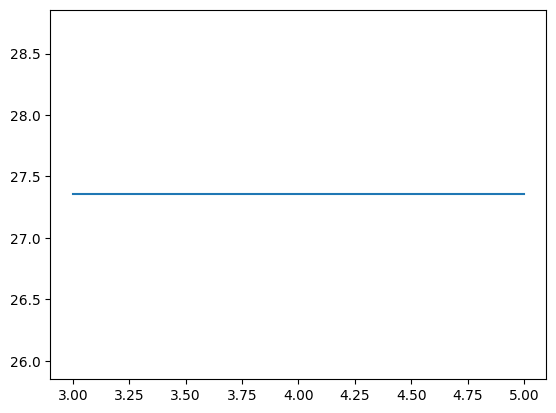

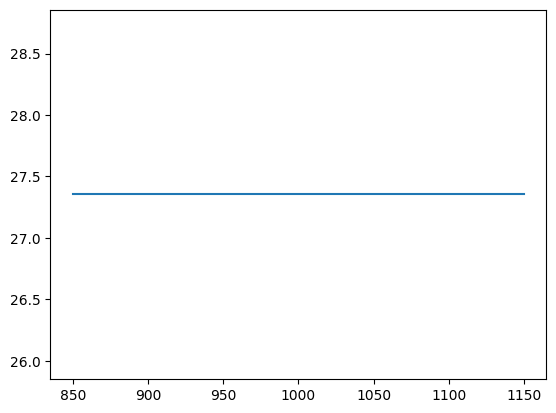

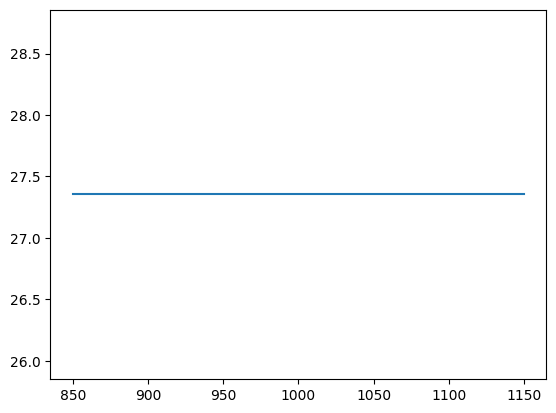

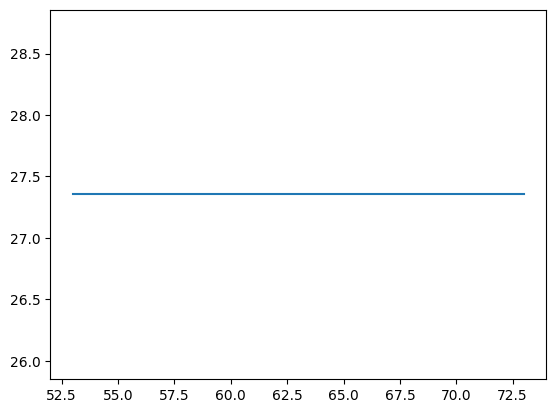

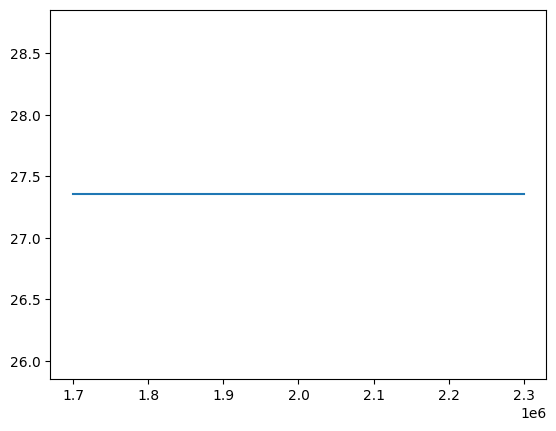

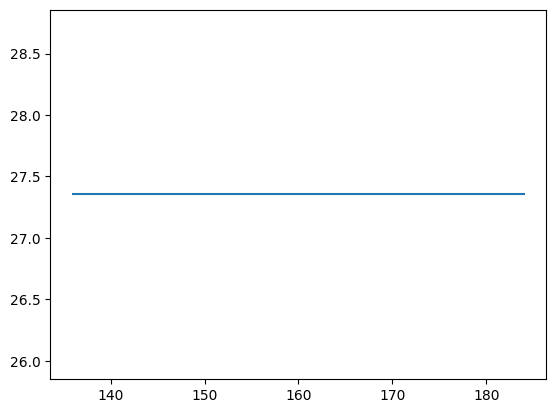

In [63]:
for i in range(6):
    plt.plot(x_grid[:,i], means_grid)
    plt.show()

In [16]:
x_grid.shape

(100,)

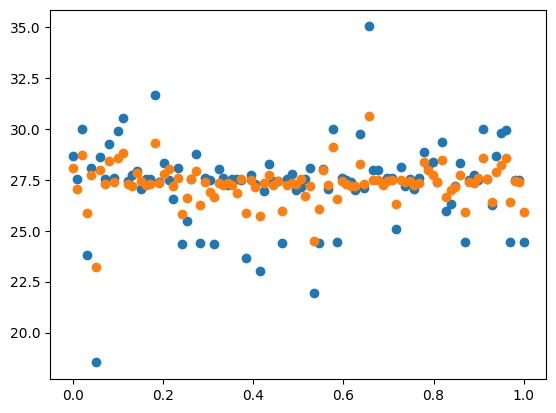

In [136]:
plt.plot(X[:,4],y, "o")
plt.plot(X[:,4],means, "o")

In [83]:
cand =  torch.tensor(scaler.fit_transform(botorch_optim.optimize_UCB(X, y)))
#initial X, y for trainig
X = df100_train[feature_cols].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df100_train[target_col].values

trained_gp = botorch_optim.train_botorch_surrogate(X, y)
trained_gp.posterior(cand).mean

ValueError: Expected 2D array, got 1D array instead:
array=[3.000000e+00 1.129000e+03 1.070000e+03 5.700000e+01 2.251976e+06
 1.770000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [82]:
X

array([[0.        , 0.85      , 0.68666667, 0.9       , 0.49495   ,
        0.33333333],
       [0.        , 0.6       , 0.07      , 0.46333333, 0.81818167,
        0.04166667],
       [0.        , 0.7       , 0.26333333, 0.02      , 0.87878833,
        0.5625    ],
       [0.        , 0.7       , 0.32333333, 0.85      , 0.89899   ,
        0.125     ],
       [0.        , 0.5       , 0.53666667, 0.73666667, 0.41414167,
        0.77083333],
       [0.        , 0.2       , 0.61666667, 0.45333333, 0.93939333,
        0.        ],
       [0.        , 0.        , 0.45333333, 0.95      , 0.60606   ,
        0.35416667],
       [0.        , 0.95      , 0.75666667, 0.67666667, 0.85858667,
        0.70833333],
       [0.        , 0.45      , 0.09      , 0.        , 0.77777833,
        0.14583333],
       [0.        , 0.5       , 0.69666667, 0.84      , 0.36363667,
        0.64583333],
       [0.        , 0.15      , 0.04      , 0.86      , 0.353535  ,
        0.33333333],
       [0.        , 0

In [ ]:
class BayesianOptimizer():
    def __init__(self, X, y, **kwargs):
        self.X = X
        self.y = y
        
    def optimize_UCB() -> np.array:
        raise NotImplementedError
        return x_cand
    
    def optimize_EI() -> np.array:
        raise NotImplementedError
        return x_cand
    
    def optimize_TS() -> np.array:
        raise NotImplementedError
        return x_cand
    
    def optimize_DYCORS() -> np.array:
        raise NotImplementedError
        return x_cand